In [1]:
import pandas as pd
import numpy as np

In [2]:
file = pd.ExcelFile('nastavnici.xlsx')

In [3]:
df = pd.read_excel(file, sheet_name='Sheet1')

In [4]:
df.head()

,RB,naspol,nasss,nasrs,nasvl,naslm,nasvp,nastk,nasmr,nasinter,nasintra,naspriro,nasfil,uceraz,PMB,SHV,VS
0,1,1,3,2,44,33,55,48,57,55,49,32,38,2,30,17,13
1,2,1,3,2,50,40,44,42,38,60,59,38,37,2,36,16,12
2,3,1,3,2,42,42,36,43,40,56,34,33,29,2,36,16,13
3,4,1,3,1,50,60,32,28,34,46,52,47,48,1,31,10,12
4,5,1,3,1,46,45,43,61,53,51,56,39,52,1,33,13,5


In [5]:
df.dtypes

RB          int64
naspol      int64
nasss       int64
nasrs       int64
nasvl       int64
naslm       int64
nasvp       int64
nastk       int64
nasmr       int64
nasinter    int64
nasintra    int64
naspriro    int64
nasfil      int64
uceraz      int64
PMB         int64
SHV         int64
VS          int64
dtype: object

In [6]:
df.isnull().sum(axis=0)

RB          0
naspol      0
nasss       0
nasrs       0
nasvl       0
naslm       0
nasvp       0
nastk       0
nasmr       0
nasinter    0
nasintra    0
naspriro    0
nasfil      0
uceraz      0
PMB         0
SHV         0
VS          0
dtype: int64

In [7]:
del df['SHV']

In [8]:
del df['VS']

In [9]:
del df['RB']

In [10]:
for index, row in df.iterrows():
    if(row["uceraz"] == 1):
        if(row['PMB'] >= 31):
            row['PMB'] = 1
        else:
            row['PMB'] = -1
    if(row["uceraz"] == 2):
        if(row['PMB'] >= 32):
            row['PMB'] = 1
        else:
            row['PMB'] = -1
    

In [11]:
df['uceraz'].value_counts()

1    79
2    71
4     1
Name: uceraz, dtype: int64

In [12]:
df = df.drop(df[df.uceraz == 4].index)

In [13]:
df['uceraz'].value_counts()

1    79
2    71
Name: uceraz, dtype: int64

### Visualisation 

In [14]:
del df['uceraz']

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 0, 'naspol'),
 Text(1.5, 0, 'nasss'),
 Text(2.5, 0, 'nasrs'),
 Text(3.5, 0, 'nasvl'),
 Text(4.5, 0, 'naslm'),
 Text(5.5, 0, 'nasvp'),
 Text(6.5, 0, 'nastk'),
 Text(7.5, 0, 'nasmr'),
 Text(8.5, 0, 'nasinter'),
 Text(9.5, 0, 'nasintra'),
 Text(10.5, 0, 'naspriro'),
 Text(11.5, 0, 'nasfil'),
 Text(12.5, 0, 'PMB')]

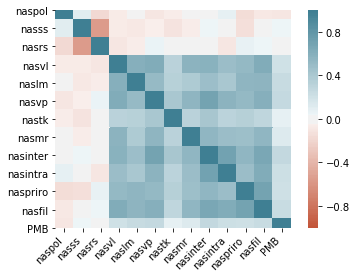

In [16]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

### Train & Test Split 

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
df.head()

,naspol,nasss,nasrs,nasvl,naslm,nasvp,nastk,nasmr,nasinter,nasintra,naspriro,nasfil,PMB
0,1,3,2,44,33,55,48,57,55,49,32,38,-1
1,1,3,2,50,40,44,42,38,60,59,38,37,1
2,1,3,2,42,42,36,43,40,56,34,33,29,1
3,1,3,1,50,60,32,28,34,46,52,47,48,1
4,1,3,1,46,45,43,61,53,51,56,39,52,1


In [18]:
a = df['PMB']
X = df
y = a
X = X.drop('PMB',axis=1)

In [19]:
from sklearn import preprocessing

# Normalizacija 

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [22]:
###STRATIFIED SHUFFLING - NADMORSKA VISINA
#Kreiram 10 train test splitova
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import svm


num_splits = 10
sss = StratifiedShuffleSplit(n_splits = num_splits, test_size = 0.2, random_state=42)
X_num = X.to_numpy()
y_num = y.to_numpy()
strat_split = sss.split(X_num,y_num)


X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []
for train_index, test_index in strat_split:
    X_train1, X_test1= X_num[train_index], X_num[test_index]
    y_train1, y_test1= y_num[train_index], y_num[test_index]
    
    X_train_list.append(X_train1)
    X_test_list.append(X_test1)
    y_train_list.append(y_train1)
    y_test_list.append(y_test1)    

In [23]:
#Predikcije SVM-a sa Stratified-om za 10 splitova trening testa

for i in range (num_splits):
    clf = svm.SVC()
    clf.fit(pd.DataFrame(X_train_list[i]), y_train_list[i])
    
    train_predict = clf.predict(pd.DataFrame(X_train_list[i]))
    acc_train = round(accuracy_score(y_train_list[i], train_predict),ndigits=4)
    prec_train = round(precision_score(y_train_list[i], train_predict),ndigits=4)
    
    test_predict = clf.predict(pd.DataFrame(X_test_list[i]))
    acc_test = round(accuracy_score(y_test_list[i], test_predict),ndigits=4)
    prec_test = round(precision_score(y_test_list[i], test_predict),ndigits=4)
    
    print("Split number: {}, Training Accuracy: {}, Training Precision: {},  Test Accuracy: {}, Test Precision: {}".format(i, 
                                                                                                                           acc_train, 
                                                                                                                           prec_train, 
                                                                                                                           acc_test, 
                                                                                                                           prec_test))


Split number: 0, Training Accuracy: 0.7583, Training Precision: 0.7583,  Test Accuracy: 0.7667, Test Precision: 0.7667
Split number: 1, Training Accuracy: 0.7583, Training Precision: 0.7583,  Test Accuracy: 0.7667, Test Precision: 0.7667
Split number: 2, Training Accuracy: 0.7583, Training Precision: 0.7583,  Test Accuracy: 0.7667, Test Precision: 0.7667
Split number: 3, Training Accuracy: 0.7583, Training Precision: 0.7583,  Test Accuracy: 0.7667, Test Precision: 0.7667
Split number: 4, Training Accuracy: 0.7583, Training Precision: 0.7583,  Test Accuracy: 0.7667, Test Precision: 0.7667
Split number: 5, Training Accuracy: 0.7583, Training Precision: 0.7583,  Test Accuracy: 0.7667, Test Precision: 0.7667
Split number: 6, Training Accuracy: 0.7583, Training Precision: 0.7583,  Test Accuracy: 0.7667, Test Precision: 0.7667
Split number: 7, Training Accuracy: 0.7583, Training Precision: 0.7583,  Test Accuracy: 0.7667, Test Precision: 0.7667
Split number: 8, Training Accuracy: 0.7583, Trai

C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\U

# Predikcije SVM-a

In [24]:
from sklearn import svm

In [25]:
clf = svm.SVC() 
#Stvaramo model svm-a
clf.fit(X_train, y_train)
#Predikcije vrsimo na trening setu da bi se uverili da nije doslo do overfitting-a
#iz output-a vidimo da je radial basis kernel defaultni kernel

C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
train_predict = clf.predict(X_train)

In [27]:
accuracy_score(y_train, train_predict)

0.7583333333333333

In [28]:
precision_score(y_train, train_predict)

0.7583333333333333

### Predikcije na test

In [29]:
test_predict = clf.predict(X_test)

In [30]:
accuracy_score(y_test, test_predict)

0.7666666666666667

In [31]:
roc_auc_score(y_test, test_predict)

0.5

In [32]:
precision_score(y_test, test_predict)

0.7666666666666667

In [33]:
recall_score(y_test, test_predict)

1.0

## Grid Search Optimizacija SVM-a

## Rezultati RBF kernela na Train setu 

In [34]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [35]:
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#                     'C': [1, 10, 100, 1000]},
#                    {'kernel': ['sigmoid'], 'C': [1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
#                     {'kernel': ['poly'], 'C': [1, 10, 100, 1000],
#                      'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}]

In [36]:
#U params-u postavljamo parametre, kao i njihov raspon, tj. provlacimo odabrane parametre
#I pravimo kombinaciju svih definisanih parametara, kako bi nasli onaj model sa najboljim rezultatima
#Postavljamo 3 kernela, kojima kroz iteracije menjamo gamma i C parametar, potom biramo najbolji
#Najbolji izvlacimo po nekoj metrici uspesnosti koju smo odabrali
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                     'C': [1, 10, 100, 1000]}]
#metrike koje biramo:
scores = ['accuracy', 'precision']

In [37]:
#Pokretanje funkcije za grid search
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        svm.SVC(), tuned_parameters, scoring=score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    print("Means:")
    print(means)

# Tuning hyper-parameters for accuracy



C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

Grid scores on development set:
Means:
[0.76666667 0.75833333 0.75833333 0.75833333 0.75833333 0.725
 0.76666667 0.75833333 0.75833333 0.75833333 0.65833333 0.74166667
 0.75       0.75833333 0.75833333 0.675      0.675      0.74166667
 0.75       0.75833333]
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:
Means:
[0.7692392  0.75833333 0.75833333 0.75833333 0.75833333 0.78989719
 0.77373482 0.75833333 0.75833333 0.75833333 0.78059347 0.78844486
 0.76074561 0.75833333 0.75833333 0.78596612 0.79583135 0.78199628
 0.76074561 0.75833333]


C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## RBF Best Estimator Metrike na Test setu 

In [38]:
best_estimator_rbf = clf.best_estimator_

In [39]:
# Kako izgleda najbolji estimator - njegovi parametri
best_estimator_rbf

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
rbf_predict = best_estimator_rbf.predict(X_test)

In [41]:
accuracy_score(y_test, rbf_predict)

0.7666666666666667

In [42]:
precision_score(y_test, rbf_predict)

0.8076923076923077

In [43]:
roc_auc_score(y_test, rbf_predict)

0.5993788819875776

## Rezultati Sigmoid na train setu 

In [44]:
tuned_parameters = [{'kernel': ['sigmoid'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                     'C': [1, 10, 100, 1000]}]
#metrike koje biramo:
scores = ['accuracy', 'precision']

In [45]:
#Pokretanje funkcije za grid search
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        svm.SVC(), tuned_parameters, scoring=score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    print("Means:")
    print(means)

C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# Tuning hyper-parameters for accuracy



C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:

{'C': 1000, 'gamma': 0.01, 'kernel': 'sigmoid'}

Grid scores on development set:
Means:
[0.75833333 0.75833333 0.75833333 0.75833333 0.75833333 0.75833333
 0.75833333 0.75833333 0.75833333 0.75833333 0.68333333 0.74166667
 0.75833333 0.75833333 0.75833333 0.625      0.725      0.76666667
 0.75833333 0.75833333]
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.1, 'kernel': 'sigmoid'}

Grid scores on development set:
Means:
[0.75833333 0.75833333 0.75833333 0.75833333 0.75833333 0.75833333
 0.75833333 0.75833333 0.75833333 0.75833333 0.77482917 0.80566789
 0.75833333 0.75833333 0.75833333 0.74779215 0.82134519 0.77889864
 0.75833333 0.75833333]


## Sigmoid Best estimator metrike na test setu 

In [46]:
best_estimator_sigmoid = clf.best_estimator_

In [47]:
best_estimator_sigmoid

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
sigmoid_predict = best_estimator_sigmoid.predict(X_test)

In [49]:
accuracy_score(y_test, sigmoid_predict)

0.6

In [50]:
precision_score(y_test, sigmoid_predict)

0.72

In [51]:
roc_auc_score(y_test, sigmoid_predict)

0.391304347826087

## Predict Polinomijalni na train 

In [52]:
tuned_parameters = [{'kernel': ['poly'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                     'C': [1, 10, 100, 1000]}]
#metrike koje biramo:
scores = ['accuracy', 'precision']

In [53]:
#Pokretanje funkcije za grid search
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        svm.SVC(), tuned_parameters, scoring=score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    print("Means:")
    print(means)

C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# Tuning hyper-parameters for accuracy



C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters set found on development set:

{'C': 100, 'gamma': 0.1, 'kernel': 'poly'}

Grid scores on development set:
Means:
[0.70833333 0.75833333 0.75833333 0.75833333 0.75833333 0.66666667
 0.75833333 0.75833333 0.75833333 0.75833333 0.63333333 0.76666667
 0.75833333 0.75833333 0.75833333 0.63333333 0.70833333 0.75833333
 0.75833333 0.75833333]
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 100, 'gamma': 1, 'kernel': 'poly'}

Grid scores on development set:
Means:
[0.78449755 0.75833333 0.75833333 0.75833333 0.75833333 0.78334314
 0.75833333 0.75833333 0.75833333 0.75833333 0.78614041 0.77872994
 0.75833333 0.75833333 0.75833333 0.78614041 0.78449755 0.75833333
 0.75833333 0.75833333]


C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Predict Polinomijalni na testu 

In [54]:
best_estimator_poly = clf.best_estimator_

In [55]:
best_estimator_poly

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
poly_predict = best_estimator_poly.predict(X_test)

In [57]:
accuracy_score(y_test,poly_predict)

0.6333333333333333

In [58]:
accuracy_score(y_test,poly_predict)

0.6333333333333333

In [59]:
roc_auc_score(y_test,poly_predict)

0.562111801242236

# Predikcije na Decision Tree

## Predikcije na Gini Decision Tree - Train set

In [60]:
from sklearn import tree


In [61]:
#tuned_parameters = {
#    'criterion': ['entropy', 'gini'],
#    'min_samples_leaf': range(1,30,3),
#    'max_depth': range(2,16,2)
#}

In [62]:
tuned_parameters = {
    'criterion': ['gini'],
    'min_samples_leaf': range(1,30,3),
    'max_depth': range(2,20,2)
}


In [63]:
tree1 = tree.DecisionTreeClassifier(random_state = 0)
grid = GridSearchCV(estimator=tree1, param_grid= tuned_parameters, n_jobs=-1, verbose=1, scoring='accuracy')

In [64]:
grid.fit(X_train, y_train)

C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    2.8s finished
C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 30, 

In [65]:
final_tree = grid.best_estimator_
final_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [66]:
final_tree.fit(X_train, y_train)
y_pred = final_tree.predict(X_train)

## Gini Rezultati Predict na train 

In [67]:
accuracy_score(y_train,y_pred)

0.7666666666666667

In [68]:
precision_score(y_train,y_pred)

0.8387096774193549

In [69]:
roc_auc_score(y_train,y_pred)

0.6699507389162562

## Gini Decision Predict na test

In [70]:
dr_predict = final_tree.predict(X_test)

In [71]:
accuracy_score(y_test, dr_predict)

0.7

In [72]:
roc_auc_score(y_test, dr_predict)

0.45652173913043476

In [73]:
precision_score(y_test, dr_predict)

0.75

## Entropy predict na train 

In [74]:
tuned_parameters = {
    'criterion': ['entropy'],
    'min_samples_leaf': range(1,30,3),
    'max_depth': range(2,20,2)
}

In [75]:
tree1 = tree.DecisionTreeClassifier(random_state = 0)
grid = GridSearchCV(estimator=tree1, param_grid= tuned_parameters, n_jobs=-1, verbose=1, scoring='accuracy')

In [76]:
grid.fit(X_train, y_train)

C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.4s finished
C:\Users\cicvam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 3

In [77]:
final_tree = grid.best_estimator_
final_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=22, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [78]:
final_tree.fit(X_train, y_train)
y_pred = final_tree.predict(X_train)

In [79]:
accuracy_score(y_train,y_pred)

0.7666666666666667

In [80]:
precision_score(y_train,y_pred)

0.8387096774193549

In [81]:
roc_auc_score(y_train,y_pred)

0.6699507389162562

## Entropy Decision Tree Results Test 

In [82]:
y_pred = final_tree.predict(X_test)

In [83]:
accuracy_score(y_test,y_pred)

0.7

In [84]:
precision_score(y_test,y_pred)

0.75

In [85]:
roc_auc_score(y_test,y_pred)

0.45652173913043476

# Neuronska Predict

## Relu Aktivaciona 

### 100

In [86]:
from sklearn.neural_network import MLPClassifier

In [87]:
clf = MLPClassifier(solver='lbfgs', activation = 'relu', alpha=1e-5,hidden_layer_sizes=(100), random_state=1)
clf = clf.fit(X_train,y_train)

In [88]:
nn_predict = clf.predict(X_train)

In [89]:
accuracy_score(y_train, nn_predict)

1.0

In [90]:
precision_score(y_train, nn_predict)

1.0

### NN 100 test predict 

In [91]:
nn_predict = clf.predict(X_test)

In [92]:
accuracy_score(y_test, nn_predict)

0.7666666666666667

In [93]:
precision_score(y_test, nn_predict)

0.8636363636363636

## 50, 50 

In [94]:
clf = MLPClassifier(solver='lbfgs', activation = 'relu', alpha=1e-5,hidden_layer_sizes=(50,50), random_state=1)
clf = clf.fit(X_train,y_train)

In [95]:
nn_predict = clf.predict(X_train)

In [96]:
accuracy_score(y_train, nn_predict)

0.9333333333333333

In [97]:
precision_score(y_train, nn_predict)

0.9368421052631579

### NN 50,50 test  

In [98]:
nn_predict = clf.predict(X_test)

In [99]:
accuracy_score(y_test, nn_predict)

0.6666666666666666

In [100]:
precision_score(y_test, nn_predict)

0.782608695652174

## Tanh 

### 100 

In [101]:
clf = MLPClassifier(solver='lbfgs', activation = 'tanh', alpha=1e-5,hidden_layer_sizes=(100), random_state=1)
clf = clf.fit(X_train,y_train)

In [102]:
nn_predict = clf.predict(X_train)
accuracy_score(y_train, nn_predict)

1.0

In [103]:
precision_score(y_train, nn_predict)

1.0

### 100 Test 

In [104]:
nn_predict = clf.predict(X_test)
accuracy_score(y_test, nn_predict)

0.7333333333333333

In [105]:
precision_score(y_test, nn_predict)

0.8

## 50 Tanh Train 

In [106]:
clf = MLPClassifier(solver='lbfgs', activation = 'tanh', alpha=1e-5,hidden_layer_sizes=(50), random_state=1)
clf = clf.fit(X_train,y_train)
nn_predict = clf.predict(X_train)

In [107]:
accuracy_score(y_train, nn_predict)

1.0

In [108]:
precision_score(y_train, nn_predict)

1.0

## 50 Tanh Test 

In [109]:
nn_predict = clf.predict(X_test)
accuracy_score(y_test, nn_predict)

0.7

In [110]:
precision_score(y_test, nn_predict)

0.7692307692307693

## Logistic

## 50 logistic Train

In [111]:
clf = MLPClassifier(solver='lbfgs', activation = 'logistic', alpha=1e-5,hidden_layer_sizes=(50), random_state=1)
clf = clf.fit(X_train,y_train)
nn_predict = clf.predict(X_train)

In [112]:
accuracy_score(y_train, nn_predict)

0.95

In [113]:
precision_score(y_train, nn_predict)

0.9381443298969072

## 50 Logistic Test 

In [114]:
nn_predict = clf.predict(X_test)
accuracy_score(y_test, nn_predict)

0.7333333333333333

In [115]:
precision_score(y_test, nn_predict)

0.7586206896551724

## 100 Logistic Train 

In [116]:
clf = MLPClassifier(solver='lbfgs', activation = 'logistic', alpha=1e-5,hidden_layer_sizes=(100), random_state=1)
clf = clf.fit(X_train,y_train)
nn_predict = clf.predict(X_train)

In [117]:
accuracy_score(y_train, nn_predict)

0.95

In [118]:
precision_score(y_train, nn_predict)

0.9381443298969072

## 100 Logistic Test 

In [119]:
nn_predict = clf.predict(X_test)
accuracy_score(y_test, nn_predict)

0.7

In [120]:
precision_score(y_test, nn_predict)

0.75